In [ ]:
"""
Proyek Akhir: Klasifikasi Gambar
Kelas Belajar Machine Learning untuk Pemula
dicoding.com
oleh,
Vincent Andreas Constantein Togatorop (21)
vincentandreas999@gmail.com
"""

import tensorflow as tf
print("VERSION: {}".format(tf.__version__))

#get data rockpaperscissors
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

VERSION: 2.5.0
--2021-06-08 00:43:26--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  2.82MB/s    in 82s     

2021-06-08 00:44:48 (3.77 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#proses ekstrasi file
import os, zipfile
lokal_zip = 'rockpaperscissors.zip'
referensi = zipfile.ZipFile(lokal_zip, 'r')
os.mkdir('Images') #buat direktori baru
referensi.extractall('./Images')
referensi.close()

In [ ]:
#organisir directory paper, rock dan scissors
import os, zipfile
main = os.path.join('./Images/rockpaperscissors')
paper_path = os.path.join(main, 'paper')
rock_path = os.path.join(main, 'rock')
scissors_path = os.path.join(main, 'scissors')

#buat list yang berisi direktori per gambar
paper_list = []
for each in os.listdir(paper_path):
  hasil = os.path.join(paper_path, each)
  paper_list.append(hasil)

rock_list = []
for each in os.listdir(rock_path):
  hasil = os.path.join(rock_path, each)
  rock_list.append(hasil)

scissors_list = []
for each in os.listdir(scissors_path):
  hasil = os.path.join(scissors_path, each)
  scissors_list.append(hasil)


In [ ]:
#buat dataframe yang berisi directory dan juga label!
import pandas as pd
label_paper = ['PAPER' for _ in range(len(paper_list))]
label_rock = ['ROCK' for _ in range(len(rock_list))]
label_scissors = ['SCISSORS' for _ in range(len(scissors_list))]

data_list = paper_list + rock_list + scissors_list # adalah directory setiap gambar
data_label = label_paper + label_rock + label_scissors # label untuk setiap directory

#bagi data menjadi train dan juga validation
from sklearn.model_selection import train_test_split as tts
X_train, X_valid, y_train, y_valid = tts(data_list, data_label, test_size=0.4, random_state=32)

objek_train = {'DIR': X_train, 'LABEL': y_train}
objek_valid = {'DIR': X_valid, 'LABEL': y_valid}

print(
    "TOTAL DATA TRAINING: {}".format(len(X_train)),
    "TOTAL DATA VALIDATION: {}".format(len(X_valid)),
    sep='\n'
)

#buat dataframe untuk training dan juga validation!
data_train = pd.DataFrame(objek_train)
data_valid = pd.DataFrame(objek_valid)

TOTAL DATA TRAINING: 1312
TOTAL DATA VALIDATION: 876


In [ ]:
#buat generator image untuk augmentasi gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
train_datagen = IDG(
    rescale=1./255,
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.20,
    width_shift_range=0.20, 
    height_shift_range=0.20,
    zoom_range=[0.75, 1.25],
    fill_mode='nearest'
)
valid_datagen = IDG(
    rescale=1./255,
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.20,
    width_shift_range=0.20, 
    height_shift_range=0.20,
    zoom_range=[0.75, 1.25],
    fill_mode='nearest'
)

#koneksikan dengan direktory masing-masing file!
train_generator = train_datagen.flow_from_dataframe(
    data_train, x_col='DIR', y_col='LABEL', target_size=(150,150), batch_size=4, class_mode='categorical'
)
valid_generator = valid_datagen.flow_from_dataframe(
    data_valid, x_col='DIR', y_col='LABEL', target_size=(150,150), batch_size=4, class_mode='categorical'
)

Found 1312 validated image filenames belonging to 3 classes.
Found 876 validated image filenames belonging to 3 classes.


In [ ]:
#membuat model sequential dengan keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
model = Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
  layers.MaxPool2D(pool_size=(2,2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPool2D(pool_size=(2,2)),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.MaxPool2D(pool_size=(2,2)),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.MaxPool2D(pool_size=(2,2)),
  layers.Flatten(),
  layers.Dropout(0.5),
  layers.Dense(512, activation='relu'),
  layers.Dense(3, activation='softmax')
])

#melakukan compiling pada model
model.compile(
  loss='CategoricalCrossentropy',
  optimizer='RMSprop',
  metrics=['accuracy']
  )
#melakukan fitting pada model yang sudah dibuat
model.fit(
  train_generator,
  steps_per_epoch=50,
  epochs=48,
  validation_data=valid_generator,
  validation_steps=5,
  verbose=1
  )

Epoch 1/48
50/50 [==============================] - 14s 273ms/step - loss: 1.3305 - accuracy: 0.3150 - val_loss: 1.0983 - val_accuracy: 0.3000
Epoch 2/48
50/50 [==============================] - 14s 269ms/step - loss: 1.1067 - accuracy: 0.3050 - val_loss: 1.0943 - val_accuracy: 0.5000
Epoch 3/48
50/50 [==============================] - 13s 266ms/step - loss: 1.1210 - accuracy: 0.3700 - val_loss: 1.0871 - val_accuracy: 0.5000
Epoch 4/48
50/50 [==============================] - 13s 266ms/step - loss: 1.0969 - accuracy: 0.4450 - val_loss: 1.0488 - val_accuracy: 0.5000
Epoch 5/48
50/50 [==============================] - 13s 266ms/step - loss: 0.8483 - accuracy: 0.5700 - val_loss: 0.8231 - val_accuracy: 0.5500
Epoch 6/48
50/50 [==============================] - 13s 266ms/step - loss: 0.7078 - accuracy: 0.6900 - val_loss: 0.4649 - val_accuracy: 0.8500
Epoch 7/48
50/50 [==============================] - 13s 265ms/step - loss: 0.5440 - accuracy: 0.7750 - val_loss: 0.3779 - val_accuracy: 0.9000

Saving 20210607_174643.jpg to 20210607_174643 (1).jpg
LABEL: ['PAPER', 'ROCK', 'SCISSORS']
PREDIKSI: PAPER (1.0)


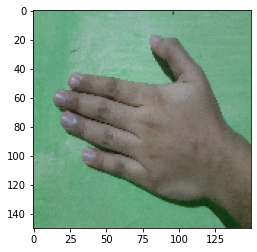

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded_file = files.upload()
 
for every in uploaded_file.keys():
  img = image.load_img(every, target_size=(150,150))
  imgplot = plt.imshow(img)
  X = image.img_to_array(img)
  X = np.expand_dims(X, axis=0)

  images = np.vstack([X])
  kelas = model.predict(images, batch_size=10)
  labels = list(train_generator.class_indices.keys())
  hasil = labels[np.argmax(kelas)]
  print("LABEL: {}".format(labels))
  print("PREDIKSI: {} ({})".format(hasil, np.max(kelas)))